In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../data/wine.csv")
data = data.drop("index", axis=1)
data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
252,11.1,0.35,0.48,3.1,0.090,5.0,21.0,0.99860,3.17,0.53,10.5,5
6075,6.0,0.20,0.38,1.3,0.034,37.0,104.0,0.98865,3.11,0.52,12.7,6
4003,9.8,0.16,0.46,1.8,0.046,23.0,130.0,0.99587,3.04,0.67,9.6,5
4129,5.8,0.30,0.12,1.6,0.036,57.0,163.0,0.99239,3.38,0.59,10.5,6
4594,6.6,0.28,0.34,0.8,0.037,42.0,119.0,0.98880,3.03,0.37,12.5,6
3272,6.6,0.27,0.31,5.3,0.137,35.0,163.0,0.99510,3.20,0.38,9.3,5
717,7.6,0.46,0.11,2.6,0.079,12.0,49.0,0.99680,3.21,0.57,10.0,5
850,9.3,0.43,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5,5
4410,7.4,0.30,0.32,1.7,0.030,23.0,128.0,0.99290,3.17,0.66,10.9,5
1059,8.9,0.48,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,7


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
X = data.iloc[:,0:11].values # first columns
y = data.iloc[:,11:].values # last columns

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(5197, 11) (5197, 1) (1300, 11) (1300, 1)


In [5]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [6]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [7]:
score

0.6707692307692308

In [14]:
y_pred = clf.predict(X_test)
y_pred

array([6, 6, 5, ..., 7, 7, 5])

In [9]:
import matplotlib.pyplot as plt

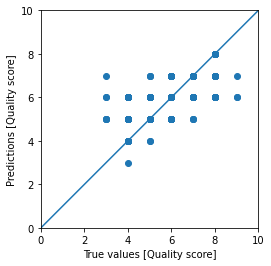

In [10]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel("True values [Quality score]")
plt.ylabel("Predictions [Quality score]")
lims = [0,10]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims)

In [11]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.41313750139001504